In [356]:
## utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## impute
from sklearn.impute import SimpleImputer

## one-hot encoding and scaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## column transformer
from sklearn.compose import make_column_transformer

## pipeline
from sklearn.pipeline import make_pipeline

## train_test_split
from sklearn.model_selection import train_test_split

In [357]:
## importando os dados

df = pd.read_csv('../data/train.csv')

In [358]:
## verificando as 5 primeiras linhas

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [359]:
## verificando o tamanho dos dados

df.shape

(891, 12)

In [360]:
## verificando os tipos dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [361]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

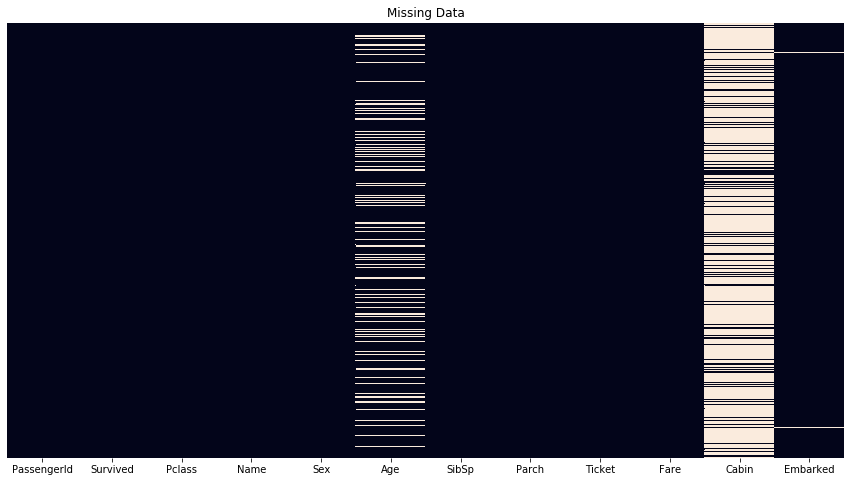

In [362]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(df.isna(),cbar=False);
ax.set_yticks([]);
ax.set_title('Missing Data');

In [363]:
df.isna().sum().map(lambda x: (x/len(df)*100))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [364]:
df.dropna(subset=['Embarked'],inplace=True)
df.drop(['Cabin','PassengerId','Ticket'],axis=1,inplace=True)
df['Age'] = df['Age'].fillna(df.Age.mean())

In [365]:
cat = df[['Pclass','Sex','Embarked']]

In [366]:
one = OneHotEncoder(sparse=False)
cat_hot = one.fit_transform(cat)

In [367]:
cat_hot

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [368]:
cat_hot = pd.DataFrame(cat_hot,columns=one.get_feature_names())
cat_hot.head()

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [369]:
df = df.merge(cat_hot,how='left',on=df.index)

In [370]:
df.drop(['key_0','Pclass','Sex','Embarked','Name'],axis=1,inplace=True)

In [371]:
df.head()

,Survived,Age,SibSp,Parch,Fare,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [373]:
x = df.drop('Survived',axis=1)
y = df.Survived

In [374]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [375]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/home/nzboan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [376]:
logreg.score(x_test,y_test)

0.850187265917603

In [377]:
from sklearn.model_selection import GridSearchCV

In [378]:
logreg = LogisticRegression()
params = {'penalty':['l1','l2'],'max_iter':[100,200,300,400],'solver':['warn','liblinear','saga']}


grid = GridSearchCV(logreg,param_grid=params,cv=5)
grid.fit(x,y)

/home/nzboan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nzboan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nzboan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nzboan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nzboan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['warn', 'liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [379]:
grid.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'warn'}

In [381]:
grid.best_score_

0.7941507311586051

## Baseline

In [176]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [179]:
df.shape

(889, 9)

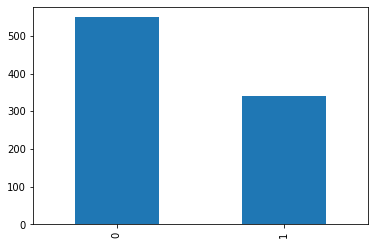

In [194]:
df.Survived.value_counts().plot(kind='bar')

In [183]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [193]:
df[df.Embarked == 'Q'].Survived.value_counts()

0    47
1    30
Name: Survived, dtype: int64

In [189]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [185]:
468/577

0.8110918544194108

In [186]:
81/312

0.25961538461538464

In [196]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [239]:
df['Age'] = df['Age'].fillna(df.Age.mean())

In [240]:
y = df.Survived

In [241]:
x = df.drop(['Survived','Name','Sex','Embarked'],axis=1)
x = x.values

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [243]:
from sklearn.linear_model import LogisticRegression

In [244]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/home/nzboan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
logreg.coef_

array([[-0.68118691, -0.03672954, -0.22122903,  0.147783  ,  0.0089408 ]])

In [247]:
y_pred = logreg.predict(x_test)

In [255]:
logreg.score(x_test,y_test)

0.704119850187266

In [257]:
df.Survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [258]:
def modelo_nasser(dados):
    del dados
    return print('morreu')

In [91]:
def foo1(x):
    return x**2

In [92]:
foo = lambda x: x**2

In [96]:
ls1 = [1,2,3]

[x**2 for x in ls1]

[1, 4, 9]

In [95]:
for x in ls1:
    print(x)

1
2
3


In [97]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [106]:
from sklearn.linear_model import LinearRegression

In [147]:
a = df[['Age','Fare']].copy()
a.dropna(subset=['Age'],inplace=True)

In [148]:
x = a.Age.values.reshape(-1,1)
y = a.Fare.values

In [149]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
lr.intercept_

24.300901449288652

In [151]:
lr.coef_

array([0.34996368])

In [152]:
previsoes = lambda x: lr.intercept_ + (lr.coef_*x)

In [153]:
previsoes(22)

array([32.00010245])

In [87]:
impute_pipeline = make_pipeline(SimpleImputer())

make_column_transformer(
    (impute_pipeline,['Age']),
    (OneHotEncoder(),['Pclass','Sex','SibSp','Parch','Embarked']),
    (MinMaxScaler(),['Fare'])
                       )


TypeError: 'tuple' object is not callable

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
df[(df.Survived == 0) & (df.Sex == 'female')].Age.mean()

25.046875

In [181]:
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [182]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [50]:
109/577

0.18890814558058924

In [51]:
231/314

0.7356687898089171